# Image Filtering Module: Pyramids

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

In [6]:
# Imports for this notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.signal import sepfir2d
# import cv2

## Pyramids

### Gaussian Pyramid
Pyramids are a way to reduce the dimensionality down to a smaller size for computational efficiency by walking down the pyramid (slightly burring then down-sampling the image to make the image smaller).

This method will retain all the Fourier information from the smaller images at each larger interval

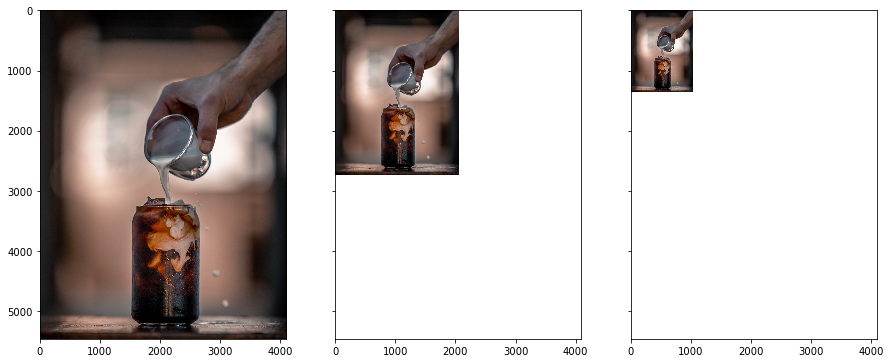

In [7]:
im = plt.imread('../images/rudy-rasmus-D9T9fI2Om3U-unsplash.jpeg')
h = [1/16, 4/16, 6/16, 4/16, 1/16]; # blur filter - values sum to 1
N = 3 # Number of pyramid levels

P = [] # This will store our pyramid
P.append(im) # first pyramid level
for k in range(1,N): # add the other pyramid levels
    im2 = np.zeros( im.shape )
    for z in range(3): # Three channels because image is color
        im2[:,:,z] = sepfir2d( im[:,:,z], h, h) # blur each color channel with the separable filter
    im2 = im2[0:-1:2, 0:-1:2, :] # down sample by removing every other pixel
    im = im2.astype(int)
    P.append(im2)
    
# display first pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15,7), dpi=72, sharex=True, sharey=True)
for k in range(N-1,-1,-1):
    ax[k].imshow(P[k].astype(np.uint8))


### Laplacian Pyramids

These are similar to Gaussian Pyramids but will describe the difference in Fourier frequency space between each layer of the Gaussian pyramid. In this way we're able to do analysis on specific frequencies present at each of the levels (rather than a cumulative representation of all lower levels). 

We can accomplish this by first building out a Gaussian Pyramid and then at each layer up-sampling and taking the difference between the up-sampled image and the original image (before it was down-sampled) at that level. 

In [8]:
# First we're going to create the Gaussian pyramid like we did above, but we'll make 4 layers since the Laplacian pyramid will not include the lowest level
im = plt.imread('../images/rudy-rasmus-D9T9fI2Om3U-unsplash.jpeg')
h = [1/16, 4/16, 6/16, 4/16, 1/16]; # blur filter - values sum to 1
N = 4 # Number of levels in gaussian

G = [] # This will store our pyramid
G.append(im) # first pyramid level
for k in range(1,N): # add the other pyramid levels
    im2 = np.zeros( im.shape )
    for z in range(3): # Three channels because image is color
        im2[:,:,z] = sepfir2d( im[:,:,z], h, h) # blur each color channel with the separable filter
    im2 = im2[0:-1:2, 0:-1:2, :] # down sample by removing every other pixel
    im = im2.astype(int)
    G.append(im2)
    
L = [] # Laplacian pyramid
for k in range(0, N-1): # build Laplacian pyramid from Gaussian
    l1 = G[k]
    l2 = G[k+1]
    l2 = cv2.resize(l2, (0,0), fx=2, fy=2) # up-sample
    D = l1 - l2 # take difference between the Gaussian pyramid level (k) and the up-sampled (k+1) level
    D = D - np.min(D) # scale in [0,1]
    D = D / np.max(D) # for display purposes
    L.append(D)
L.append(G[N-1])
    
# display first pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15,7), dpi=72, sharex=True, sharey=True)
for k in range(N-1,-1,-1):
    ax[k].imshow(L[k].astype(np.uint8))

NameError: name 'cv2' is not defined